In [14]:
import sys
sys.path.append("C:\projects\crowd-count")
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
from tqdm import tqdm
%matplotlib inline

In [15]:
# function to create density maps for images
def gaussian_filter_density(gt):
    print(gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print('generate density...')
    print("gt count", gt_count)
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1], pt[0]] = 1.
        if gt_count != 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print('done.')
    return density

In [16]:
#set the root to the Shanghai dataset you download
root = 'C:\projects\crowd-count\ShanghaiTech'

In [17]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root, 'part_A\\train_data', 'images')
part_A_test = os.path.join(root, 'part_A\\test_data',' images')
part_B_train = os.path.join(root, 'part_B\\train_data', 'images')
part_B_test = os.path.join(root, 'part_B\\test_data', 'images')
path_sets = [part_A_train,part_A_test]


In [18]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)


In [19]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg', '.mat').replace('images','ground-truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0, len(gt)):            
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            k[int(gt[i][1]), int(gt[i][0])] = 1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg', '.h5').replace('images','ground-truth'), 'w') as hf:
            hf['density'] = k


C:\projects\crowd-count\ShanghaiTech\part_A\train_data\images\IMG_1.jpg

(768, 1024)

generate density...

gt count

1545

done.

C:\projects\crowd-count\ShanghaiTech\part_A\train_data\images\IMG_10.jpg

(683, 1024)

generate density...

gt count

920

done.

C:\projects\crowd-count\ShanghaiTech\part_A\train_data\images\IMG_100.jpg

(654, 1024)

generate density...

gt count

371

done.

C:\projects\crowd-count\ShanghaiTech\part_A\train_data\images\IMG_101.jpg

(768, 1024)

generate density...

gt count

298

done.

C:\projects\crowd-count\ShanghaiTech\part_A\train_data\images\IMG_102.jpg

(768, 1024)

generate density...

gt count

184

KeyboardInterrupt: 

In [6]:
#now see a sample from ShanghaiA
plt.imshow(Image.open(img_paths[0]))

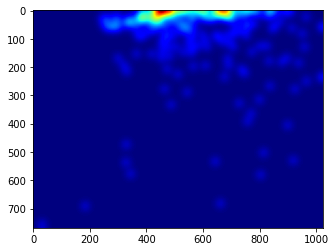

In [13]:
gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground-truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth, cmap=CM.jet)

In [ ]:
np.sum(groundtruth)# don't mind this slight variation

In [8]:
#now generate the ShanghaiB's ground truth
path_sets = [part_B_train, part_B_test]

In [9]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
        

In [12]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg', '.mat').replace('images', 'ground-truth').replace('IMG_', 'GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter(k,15)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images', 'ground-truth'), 'w') as hf:
            hf['density'] = k

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_1.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_10.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_100.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_101.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_102.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_103.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_104.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_105.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_106.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_107.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_108.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_109.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_11.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_110.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_111.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_112.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_113.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_114.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_115.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_116.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_117.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_118.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_119.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_12.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_120.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_121.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_122.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_123.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_124.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_125.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_126.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_127.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_128.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_129.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_13.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_130.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_131.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_132.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_133.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_134.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_135.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_136.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_137.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_138.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_139.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_14.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_140.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_141.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_142.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_143.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_144.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_145.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_146.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_147.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_148.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_149.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_15.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_150.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_151.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_152.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_153.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_154.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_155.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_156.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_157.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_158.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_159.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_16.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_160.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_161.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_162.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_163.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_164.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_165.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_166.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_167.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_168.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_169.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_17.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_170.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_171.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_172.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_173.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_174.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_175.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_176.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_177.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_178.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_179.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_18.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_180.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_181.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_182.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_183.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_184.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_185.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_186.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_187.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_188.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_189.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_19.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_190.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_191.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_192.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_193.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_194.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_195.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_196.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_197.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_198.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_199.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_2.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_20.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_200.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_201.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_202.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_203.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_204.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_205.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_206.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_207.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_208.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_209.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_21.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_210.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_211.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_212.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_213.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_214.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_215.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_216.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_217.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_218.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_219.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_22.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_220.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_221.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_222.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_223.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_224.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_225.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_226.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_227.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_228.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_229.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_23.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_230.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_231.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_232.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_233.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_234.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_235.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_236.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_237.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_238.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_239.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_24.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_240.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_241.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_242.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_243.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_244.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_245.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_246.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_247.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_248.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_249.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_25.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_250.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_251.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_252.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_253.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_254.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_255.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_256.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_257.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_258.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_259.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_26.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_260.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_261.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_262.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_263.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_264.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_265.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_266.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_267.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_268.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_269.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_27.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_270.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_271.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_272.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_273.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_274.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_275.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_276.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_277.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_278.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_279.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_28.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_280.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_281.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_282.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_283.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_284.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_285.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_286.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_287.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_288.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_289.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_29.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_290.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_291.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_292.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_293.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_294.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_295.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_296.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_297.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_298.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_299.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_3.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_30.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_300.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_301.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_302.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_303.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_304.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_305.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_306.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_307.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_308.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_309.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_31.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_310.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_311.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_312.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_313.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_314.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_315.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_316.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_317.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_318.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_319.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_32.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_320.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_321.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_322.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_323.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_324.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_325.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_326.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_327.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_328.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_329.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_33.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_330.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_331.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_332.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_333.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_334.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_335.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_336.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_337.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_338.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_339.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_34.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_340.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_341.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_342.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_343.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_344.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_345.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_346.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_347.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_348.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_349.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_35.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_350.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_351.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_352.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_353.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_354.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_355.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_356.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_357.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_358.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_359.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_36.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_360.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_361.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_362.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_363.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_364.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_365.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_366.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_367.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_368.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_369.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_37.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_370.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_371.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_372.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_373.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_374.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_375.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_376.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_377.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_378.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_379.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_38.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_380.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_381.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_382.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_383.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_384.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_385.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_386.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_387.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_388.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_389.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_39.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_390.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_391.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_392.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_393.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_394.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_395.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_396.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_397.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_398.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_399.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_4.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_40.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_400.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_41.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_42.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_43.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_44.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_45.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_46.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_47.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_48.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_49.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_5.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_50.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_51.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_52.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_53.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_54.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_55.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_56.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_57.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_58.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_59.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_6.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_60.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_61.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_62.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_63.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_64.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_65.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_66.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_67.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_68.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_69.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_7.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_70.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_71.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_72.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_73.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_74.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_75.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_76.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_77.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_78.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_79.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_8.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_80.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_81.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_82.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_83.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_84.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_85.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_86.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_87.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_88.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_89.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_9.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_90.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_91.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_92.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_93.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_94.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_95.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_96.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_97.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_98.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\train_data\images\IMG_99.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_1.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_10.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_100.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_101.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_102.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_103.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_104.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_105.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_106.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_107.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_108.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_109.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_11.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_110.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_111.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_112.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_113.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_114.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_115.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_116.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_117.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_118.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_119.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_12.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_120.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_121.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_122.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_123.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_124.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_125.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_126.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_127.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_128.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_129.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_13.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_130.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_131.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_132.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_133.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_134.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_135.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_136.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_137.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_138.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_139.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_14.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_140.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_141.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_142.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_143.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_144.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_145.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_146.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_147.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_148.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_149.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_15.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_150.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_151.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_152.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_153.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_154.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_155.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_156.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_157.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_158.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_159.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_16.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_160.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_161.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_162.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_163.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_164.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_165.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_166.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_167.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_168.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_169.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_17.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_170.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_171.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_172.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_173.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_174.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_175.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_176.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_177.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_178.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_179.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_18.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_180.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_181.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_182.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_183.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_184.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_185.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_186.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_187.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_188.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_189.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_19.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_190.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_191.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_192.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_193.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_194.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_195.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_196.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_197.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_198.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_199.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_2.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_20.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_200.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_201.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_202.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_203.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_204.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_205.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_206.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_207.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_208.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_209.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_21.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_210.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_211.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_212.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_213.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_214.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_215.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_216.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_217.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_218.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_219.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_22.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_220.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_221.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_222.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_223.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_224.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_225.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_226.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_227.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_228.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_229.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_23.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_230.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_231.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_232.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_233.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_234.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_235.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_236.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_237.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_238.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_239.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_24.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_240.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_241.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_242.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_243.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_244.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_245.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_246.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_247.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_248.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_249.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_25.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_250.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_251.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_252.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_253.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_254.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_255.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_256.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_257.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_258.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_259.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_26.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_260.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_261.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_262.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_263.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_264.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_265.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_266.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_267.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_268.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_269.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_27.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_270.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_271.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_272.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_273.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_274.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_275.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_276.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_277.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_278.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_279.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_28.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_280.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_281.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_282.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_283.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_284.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_285.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_286.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_287.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_288.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_289.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_29.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_290.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_291.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_292.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_293.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_294.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_295.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_296.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_297.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_298.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_299.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_3.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_30.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_300.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_301.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_302.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_303.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_304.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_305.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_306.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_307.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_308.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_309.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_31.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_310.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_311.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_312.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_313.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_314.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_315.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_316.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_32.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_33.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_34.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_35.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_36.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_37.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_38.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_39.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_4.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_40.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_41.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_42.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_43.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_44.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_45.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_46.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_47.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_48.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_49.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_5.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_50.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_51.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_52.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_53.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_54.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_55.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_56.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_57.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_58.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_59.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_6.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_60.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_61.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_62.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_63.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_64.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_65.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_66.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_67.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_68.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_69.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_7.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_70.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_71.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_72.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_73.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_74.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_75.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_76.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_77.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_78.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_79.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_8.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_80.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_81.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_82.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_83.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_84.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_85.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_86.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_87.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_88.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_89.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_9.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_90.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_91.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_92.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_93.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_94.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_95.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_96.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_97.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_98.jpg

C:\projects\crowd-count\ShanghaiTech\part_B\test_data\images\IMG_99.jpg